In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

data = pd.read_csv("datasets/MSFT.csv")
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2020-05-18  185.750000  186.199997  183.960007  184.910004  182.279190   
1  2020-05-19  185.029999  186.600006  183.490005  183.630005  181.017380   
2  2020-05-20  184.809998  185.850006  183.940002  185.660004  183.528229   
3  2020-05-21  185.399994  186.669998  183.289993  183.429993  181.323822   
4  2020-05-22  183.190002  184.460007  182.539993  183.509995  181.402908   

     Volume  
0  35264500  
1  26799100  
2  31261300  
3  29119500  
4  20826900  


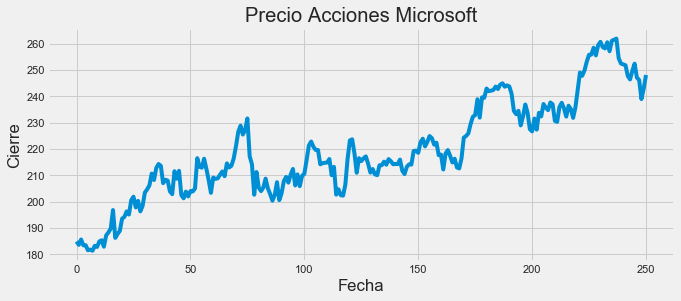

In [2]:
plt.figure(figsize=(10, 4))
plt.title("Precio Acciones Microsoft")
plt.xlabel("Fecha")
plt.ylabel("Cierre")
plt.plot(data["Close"])
plt.savefig('predecir-valor-mercado-machine-learning-1.png')

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.995421  0.994285  0.988295   0.988418 -0.194574
High       0.995421  1.000000  0.994375  0.994169   0.994168 -0.169893
Low        0.994285  0.994375  1.000000  0.995694   0.995829 -0.237993
Close      0.988295  0.994169  0.995694  1.000000   0.999857 -0.215556
Adj Close  0.988418  0.994168  0.995829  0.999857   1.000000 -0.216663
Volume    -0.194574 -0.169893 -0.237993 -0.215556  -0.216663  1.000000


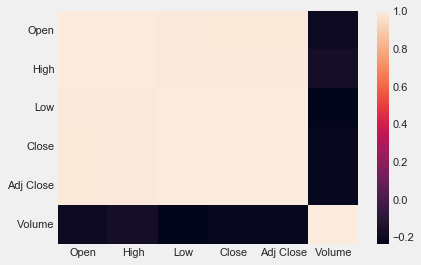

In [3]:
print(data.corr())
sns.heatmap(data.corr())
plt.savefig('predecir-valor-mercado-machine-learning-2.png')

In [4]:
X = data[["Open", "High", "Low"]]
y = data["Close"]
X = X.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeRegressor
            
modelo = DecisionTreeRegressor()
modelo.fit(X_train, y_train)
ypron = modelo.predict(X_test)
data = pd.DataFrame(data={"Precio pronosticado": ypron})
print(data.head())

   Precio pronosticado
0           224.149994
1           181.399994
2           219.619995
3           205.910004
4           213.289993
